# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [10]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', low_memory=False)
condemnations.shape

(32586, 40)

In [ ]:
# The first time I did the pd.read_csv(), it gave me a warning about one of the columns having mixed data types
# and that I should consider manually specifying the data type or setting low_memory=False
# So, I set low_memory=False
# See https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [11]:
# Let's peak at the data to see what format this column is in
condemnations['InspectDate'].head()

0    1986-07-10 00:00:00
1    2009-07-23 00:00:00
2    2003-08-06 00:00:00
3    1996-06-17 00:00:00
4    2006-12-20 00:00:00
Name: InspectDate, dtype: object

In [12]:
# Create a filter on the inspection date and reassign the variable to our filtered dataframe
year_filter = (condemnations['InspectDate'].str[:4] >= '1986') & (condemnations['InspectDate'].str[:4] <= '2014')
condemnations = condemnations[year_filter]

In [14]:
# Let's check our assertions...
print(condemnations.shape)
print(min(condemnations['InspectDate']))
print(max(condemnations['InspectDate']))

(30232, 40)
1986-01-03 00:00:00
2014-12-30 08:19:00


In [15]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [21]:
# We can do this lots of ways, but the easiest is probably a pivot table

# First we need to create a "year" column, though
condemnations['Year'] = condemnations['InspectDate'].str[0:4]

# Then build our pivot table
by_year = condemnations.pivot_table(
    index='Year',
    columns='Status',
    aggfunc="count",
    values='AcctNum'
)

# You can ignore my comment about about using np.ma.count... 
# Aparently newer Pandas versions have resolved that weirdness

In [22]:
# Let's check out the data frame to see if it looks right
by_year

Status,B,L,R,W
Year,,,,
1986,22.0,12.0,19.0,112.0
1987,91.0,20.0,8.0,361.0
1988,215.0,16.0,15.0,297.0
1989,277.0,15.0,11.0,432.0
1990,119.0,29.0,8.0,322.0
1991,139.0,18.0,4.0,351.0
1992,204.0,30.0,4.0,258.0
1993,185.0,47.0,2.0,193.0
1994,208.0,94.0,5.0,293.0


In [24]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

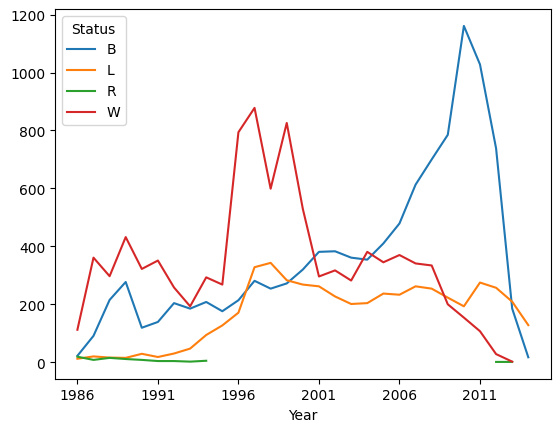

In [25]:
%matplotlib inline
by_year.plot()

---

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.amazonaws.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [23]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

In [24]:
# Look at our data to see what we've got
meetings.head()

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,81.2167,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,31.9333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,110.8667,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,27.7500,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,19.7333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN


In [25]:
meetings.shape

(1188, 25)

In [26]:
# Create start date column
meetings['startDate'] = meetings['startTime'].str[0:10]

# Create before and during filters
before_filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
during_filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')

# Create the Time Frame column with our "BEFORE" or "DURING" value
meetings.loc[before_filter, 'timeFrame'] = 'Before'
meetings.loc[during_filter, 'timeFrame'] = 'During'

In [27]:
# Let's look at our new columns to see if it looks basically right
meetings['timeFrame'].value_counts()

During    278
Before    179
Name: timeFrame, dtype: int64

In [34]:
# Now we want to pivot our data so each timeFrame value becomes a separate column and we only have one row per user
summary = meetings.pivot_table(
    index='userName',
    columns='timeFrame',
    values='meeting_uuid',
    aggfunc='count',
    fill_value=0
)

In [35]:
# Did we do something that makes sense?
summary.head()

timeFrame,Before,During
userName,,
Drew.Marco,12,19
amit.bhagat,17,30
andrea.bryant.amitechsolutions,5,3
angie.warren,5,9
chris.rogers.amitechsolutions,4,3


In [36]:
# Now, let's calculate a difference and percent change
summary['change'] = summary['During'] - summary['Before']
summary['pctChange'] = summary['change'] / summary['Before']

In [37]:
# Let's look again
summary

timeFrame,Before,During,change,pctChange
userName,,,,
Drew.Marco,12,19,7,0.583333
amit.bhagat,17,30,13,0.764706
andrea.bryant.amitechsolutions,5,3,-2,-0.400000
angie.warren,5,9,4,0.800000
chris.rogers.amitechsolutions,4,3,-1,-0.250000
eric.keeney,15,27,12,0.800000
eric.rodman,4,12,8,2.000000
jeff.hatfield.amitechsolutions,13,26,13,1.000000
jennifer.patton.amitechs,5,7,2,0.400000


In [38]:
# Looks like we need to clean up one row: Vishal Dev
summary.dropna(subset='pctChange', inplace=True)
summary.shape

(22, 4)

---

In [39]:
assert(len(summary) == 22)

In [40]:
summary['pctChange'].mean()

0.9151643397807079

In [41]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
